<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#data-prep" data-toc-modified-id="data-prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>data prep</a></span><ul class="toc-item"><li><span><a href="#import-module" data-toc-modified-id="import-module-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import module</a></span></li><li><span><a href="#read-data" data-toc-modified-id="read-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>read data</a></span></li></ul></li><li><span><a href="#modeling" data-toc-modified-id="modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>modeling</a></span><ul class="toc-item"><li><span><a href="#random-forest" data-toc-modified-id="random-forest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>random forest</a></span><ul class="toc-item"><li><span><a href="#importances-plot" data-toc-modified-id="importances-plot-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>importances plot</a></span></li></ul></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>t-SNE</a></span></li><li><span><a href="#SUR" data-toc-modified-id="SUR-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SUR</a></span><ul class="toc-item"><li><span><a href="#example" data-toc-modified-id="example-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>example</a></span></li></ul></li></ul></li></ul></div>

李家翔;
2018-03-31

# data prep

## import module

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

## read data

In [5]:
data = pd.read_csv("full_data_ipt_miss_wo_scale.csv")

In [11]:
data = data.drop("rank",axis=1).drop("code",axis=1)

In [13]:
X = data.drop("return",axis = 1)
y = data["return"]

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                        random_state=1)

# modeling

## random forest

In [27]:
forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

常规操作100个树，这种30万数据量的样本，简单的随机森林R已经很难带动了，还是数据刷好，在Python弄吧，R包`randomForest`要好好搞搞开发了。

In [28]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = forest.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

### importances plot

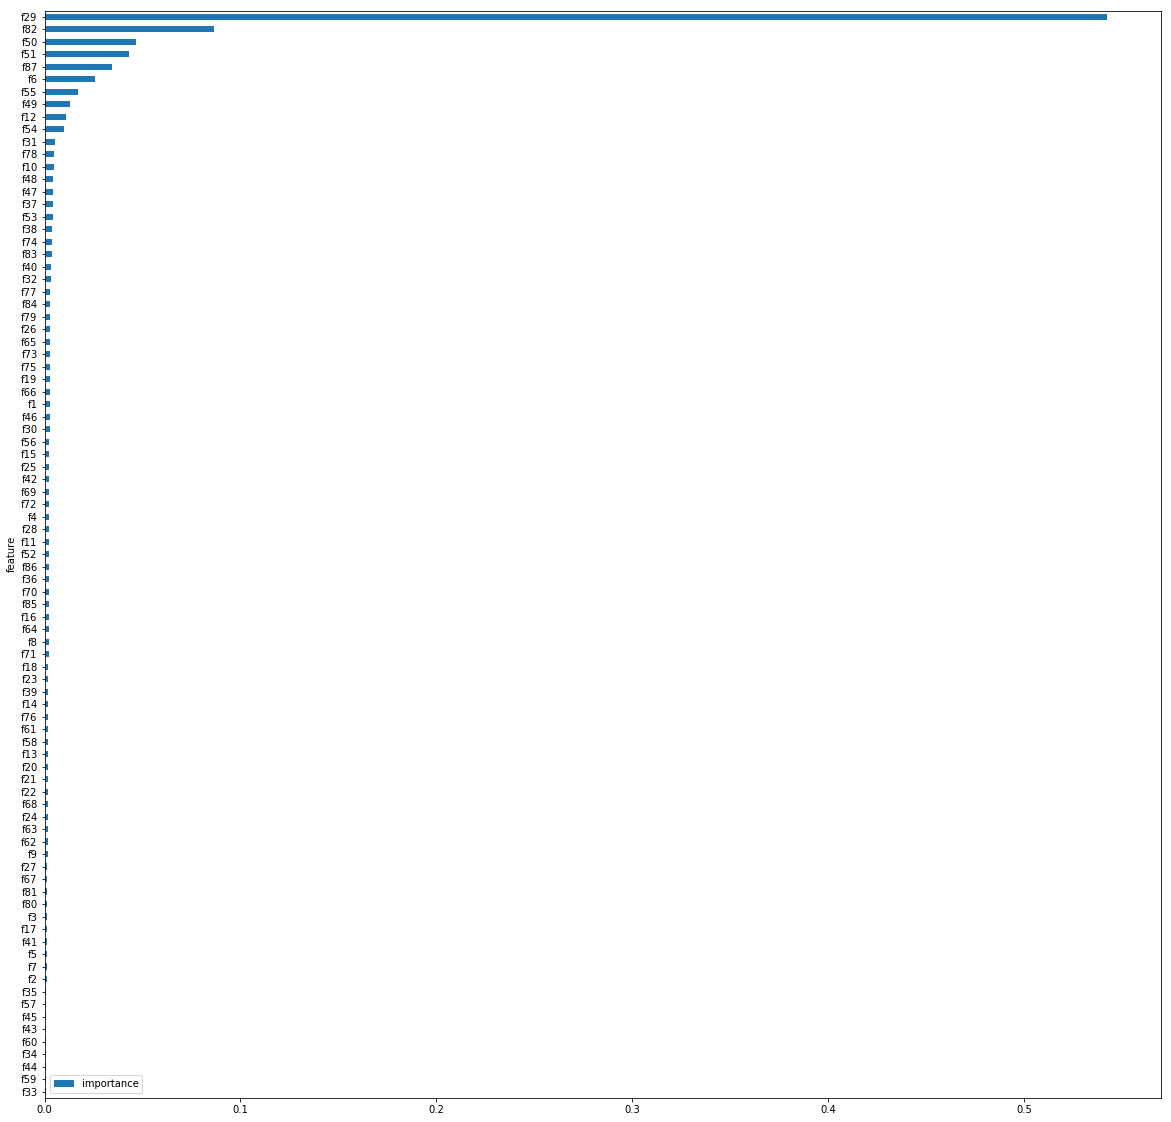

In [29]:
features.plot(kind='barh', figsize=(20, 20))
plt.show()

## t-SNE

参考:
[sklearn.manifold.TSNE — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [31]:
from sklearn.manifold import TSNE

In [35]:
print type(X_train)
print type(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


    X_embedded = TSNE(n_components=2).fit_transform(X_train)